# Exploring Marketing Strategies for Parents and Non-Parents

# Introduction:
Parents and non-parents both have qualities that make them desirable as customers. The shopping habits of young adults are often habituated during their time as children. By increasing the number of parents in the store or by influencing their shopping habits a store would potentially be able to shape the brand loyalties of the next wave of consumers. While non-parents lack this potential long term benefit, they do present an immediate upside in virtue of their increased disposable income relative to parents. By not having children they are able to spend more on themselves which can lead to their buying more premium goods or being less sensitive to price markups thus providing an opportunity for increasing a store's revenue.

Given the desirable qualities of each group the importance of the question 'How can one best reach each demographic?' cannot be understated. This report seeks to answer this question by first providing an initial characterization of parents and non-parents in terms of their shopping habits and present contribution to total sales. Then this report analyzes day to day foot traffic totals and promotion sensitivity of each group to best sketch a strategy for reaching them with targeted promotions. The hope is that this report will allow Regork to better target each group with group specific promotions with the end goal of having greater sway over their shopping habits.

### Importing Packages and Data Set

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from completejourney_py import get_data
cj = get_data()

In [3]:
products = cj['products']
transactions = cj['transactions']
demographics = cj['demographics']

### Initial Insights: Percent Customer Base, Sales Volume and Transaction Volume

In [4]:
df = demographics.merge(transactions, how= 'inner', on= 'household_id')
df = df.merge(products, how= 'inner', on= 'product_id')
kids = df[df['kids_count']!='0']
nokids = df[df['kids_count']=='0']

In [5]:
household_num = [nokids['household_id'].nunique(), kids['household_id'].nunique()]
sales_val = [nokids['sales_value'].sum(), kids['sales_value'].sum()]
transact_number = [nokids['transaction_timestamp'].nunique(), kids['transaction_timestamp'].nunique()]
labels = ['Non-Parents', 'Parents']

Text(0.5, 0.98, 'Parents and Non-Parents: Initial Insights')

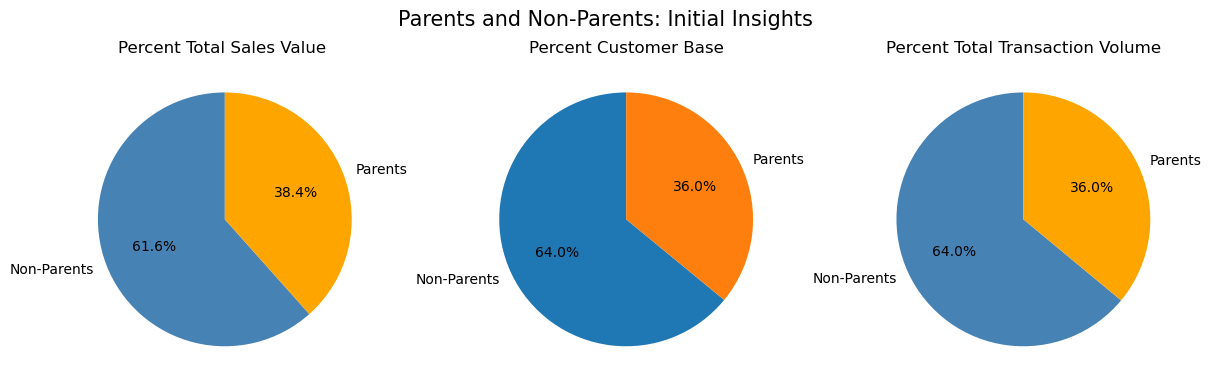

In [6]:
fig, ax_array = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
ax_array[1].pie(household_num, labels = labels, autopct = '%1.1f%%', startangle = 90)
ax_array[1].set_title('Percent Customer Base')
ax_array[0].pie(sales_val, labels = labels, autopct = '%1.1f%%', startangle = 90, colors = ['steelblue', 'orange'])
ax_array[0].set_title('Percent Total Sales Value ')
ax_array[2].pie(transact_number, labels = labels, autopct = '%1.1f%%', startangle = 90, colors = ['steelblue', 'orange'])
ax_array[2].set_title('Percent Total Transaction Volume')
fig.suptitle('Parents and Non-Parents: Initial Insights', size = (15))

Immediately we find that Parents and Non-Parents account for shares of the Regork's total sales volume and total number of transactions for 2017 proportionate to their share of the customer base. We can derive a key insight from this information. Parents are buying cheaper relative to non-parents. The parent households represent more mouths to feed than households without children, thus, given that parents are not spending more on average than non-parents we can conclude that they are buying cheaper variants of food or cheaper foods altogether.

### Consumption Profile: Top Ten Items for Each Group

In [10]:
top10_value = kids.groupby('product_type', as_index =False).agg({'sales_value':'sum'})
top10_value = top10_value.sort_values(by='sales_value', ascending=False)[1:11]
l = ['Milk', 'Cans of Soda', 'Beer', 'Diapers', 'Cigarettes', 'Shredded Cheese', 'Beef', '"Premium"', 'Primal', 'Toilet Paper']
top10_value_nokids = nokids.groupby('product_type', as_index =False).agg({'sales_value':'sum'})
top10_value_nokids = top10_value_nokids.sort_values(by='sales_value', ascending=False)[1:11]
l2 = ['Beer', 'Cans of Soda', 'Milk', 'Cigarettes', 'Beef', '"Primal"', '"Premium"', 'Frozen Entrees', 'Toilet Paper', 'Shredded Cheese']

Text(0, 0.5, 'Non-Parents')

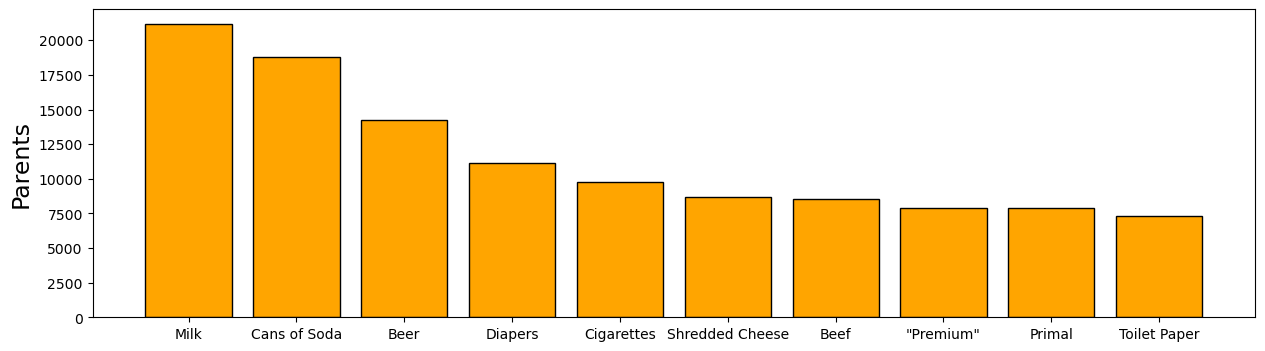

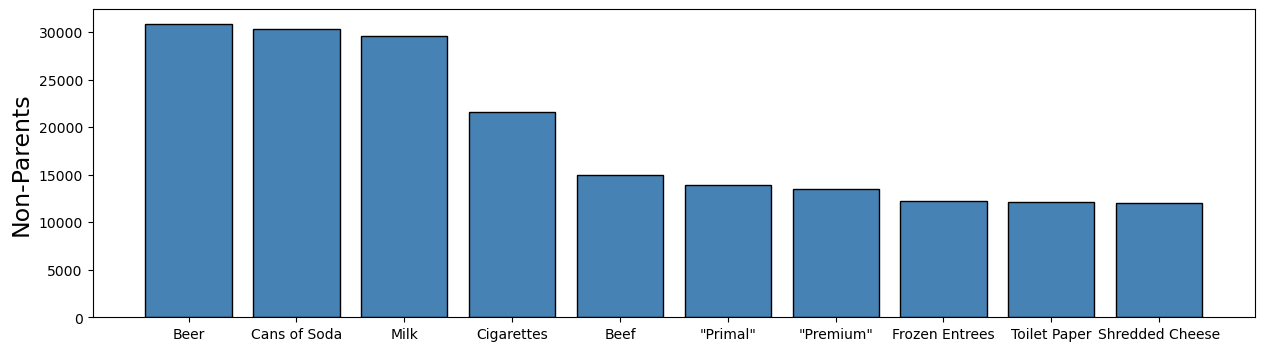

In [8]:
ig, ax = plt.subplots(figsize=(15, 4))
fig.suptitle('Top Ten Items by Total Sales Value 2017 in Dollars (Excluding Gasoline)', size = (20))
ax.bar(l, 'sales_value', data=top10_value, linewidth= 1, edgecolor= 'black', color = 'orange')
ax.set_ylabel('Parents', size = 17)
fig, ax = plt.subplots(figsize=(15, 4))
ax.bar(l2, 'sales_value', data=top10_value_nokids, linewidth= 1, edgecolor= 'black', color = 'steelblue')
ax.set_ylabel('Non-Parents', size = 17)

Here we see the top ten items by total sales value for the year 2017 for each group excluding gasoline (which would have far and away taken the top spot had it been included). Sales value was used as a metric here given that consumers tend to think of their grocery purchases in terms of cost and not quantity. Thus by aggregating according to cost we are more likely to find products for which consumers will be most sensitive to promotions. Assessing the spread here, we see clearly that non-parents skew towards more 'luxury' items with beer, cigarettes and 'premium' taking up a higher proportion of their budget than with parents.



### Good Target Products for Promotions

Text(0.5, 1.0, 'Non-Parents')

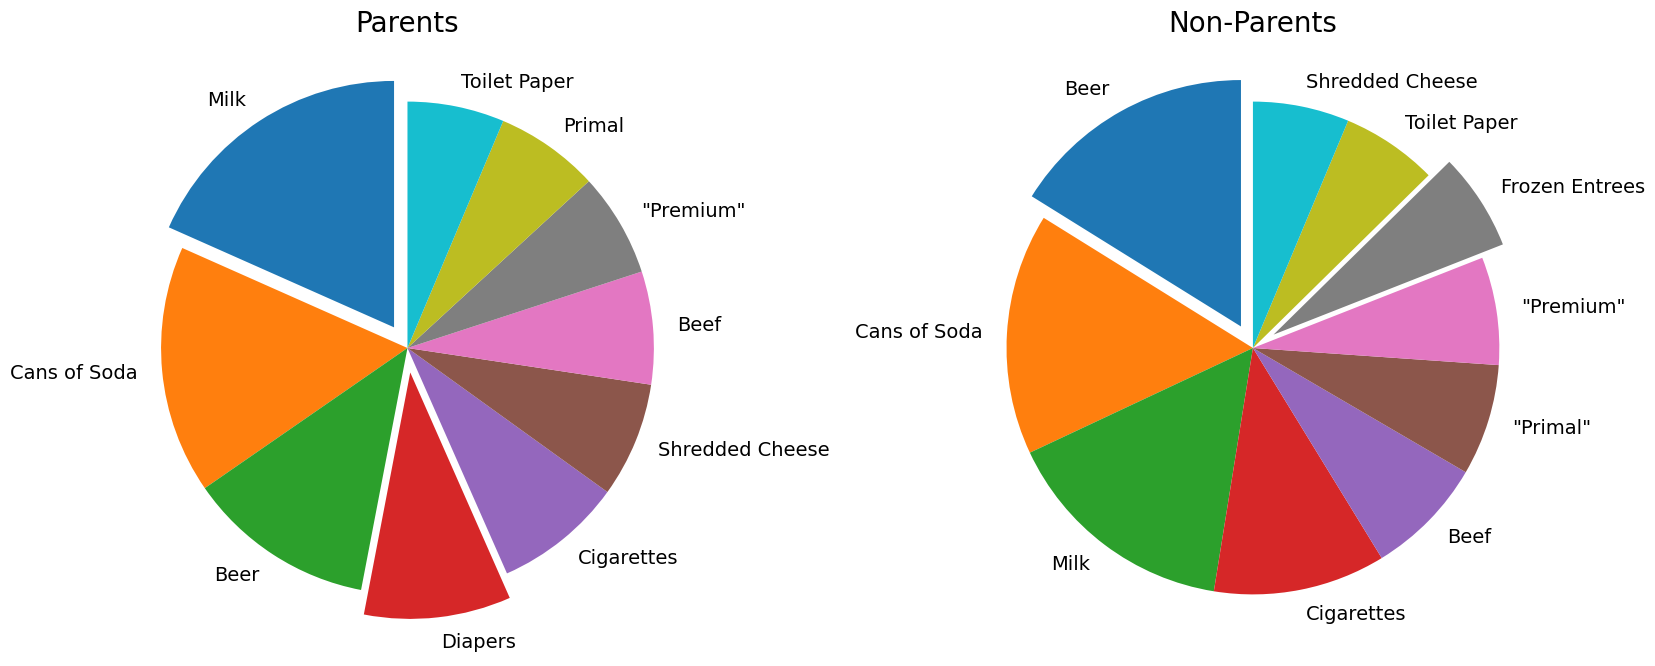

In [12]:
e = (0.1,0,0,0.1,0,0,0,0,0,0)
e2 = (0.1,0,0,0,0,0,0,0.1,0,0)
fig, ax_array = plt.subplots(1,2,figsize=(20, 8))
ax_array[0].pie(top10_value['sales_value'], labels = l, explode = e, startangle = 90, textprops={'fontsize': 14})
ax_array[0].set_title('Parents', size = 20)
ax_array[1].pie(top10_value_nokids['sales_value'], labels = l2, explode = e2, startangle = 90, textprops={'fontsize': 14})
ax_array[1].set_title('Non-Parents', size = 20)

Taking a closer look it seems as if milk and diapers make good targets for promotions for parents given that parents spend the more on milk than any other product type and given that diapers are a product unique to parents (unsurprisingly). For non-parents it seems as if beer and Frozen Entrees are good targets for promotions for similar reasons. Non-parents spend more on beer than any other product type (though given that soda and milk are a close second and third they would also be suitable candidates) and uniquely spend a significant amount on frozen entrees. Given this we would recommend providing promotions on milk or beer to bring parents and non-parents respectively into the store and setting up promotions around diaper and frozen entree displays in the store to reach each group respectively.

### In Store Traffic: Best Days to Reach Each Group

In [14]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
kid_sales = kids.set_index('transaction_timestamp')['quantity']
nokid_sales = nokids.set_index('transaction_timestamp')['quantity']
nokid_days = (nokid_sales.resample('D').sum().rename(lambda idx: idx.day_name()).groupby('transaction_timestamp').quantile([.5]).unstack().reindex(days))
kid_days = (kid_sales.resample('D').sum().rename(lambda idx: idx.day_name()).groupby('transaction_timestamp').quantile([.5]).unstack().reindex(days))

Text(0.5, 0.98, 'Weekly Shopping Patterns')

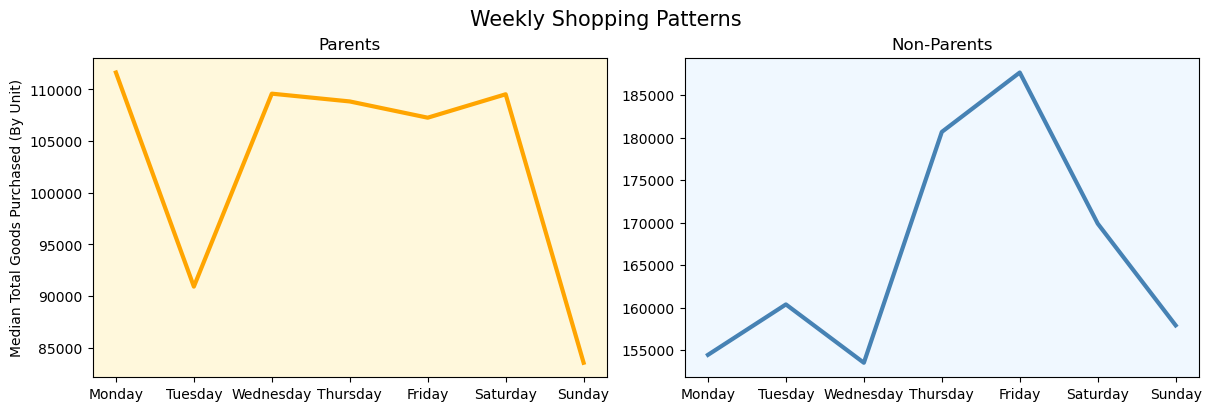

In [15]:
fig, ax_array = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
ax_array[0].plot(kid_days, color='orange', linewidth = 3)
ax_array[0].set_facecolor('cornsilk')
ax_array[0].set_title('Parents')
ax_array[0].set_ylabel('Median Total Goods Purchased (By Unit)')
ax_array[1].plot(nokid_days, color='steelblue', linewidth = 3)
ax_array[1].set_facecolor('aliceblue')
ax_array[1].set_title('Non-Parents')
fig.suptitle('Weekly Shopping Patterns', size = (15))

Above we have plotted the median number of goods sold by day of the week for parents and non-parents. We can see clearly parents do most of their shopping on Monday and Wednesday through Saturday while non-parents do most of their shopping on Thursday and Friday. Given these distinct patterns it would seem that any promotions involving diapers should focus around Monday and Wednesday given that is these days are when the density of parents in stores is highest. Likewise Friday seems to be the best day to run in-store promotions around frozen entrees given that it is the day when the density of non-parents in the store is highest.

### Promotion Receptivity: Best Means of Reaching Each Group

In [17]:
kid_coupons = kids[kids['coupon_disc']>0]
kid_disc = kid_coupons = kids[kids['retail_disc']>0]
nokid_coupons = nokids[nokids['coupon_disc']>0]
nokid_disc = nokids[nokids['retail_disc']>0]

coup = [nokid_coupons['transaction_timestamp'].nunique(), kid_coupons['transaction_timestamp'].nunique()]
disc = [nokid_disc['transaction_timestamp'].nunique(), kid_disc['transaction_timestamp'].nunique()]


Text(0.5, 1.0, 'Percent Share of Transactions Involving an In-Store Discount')

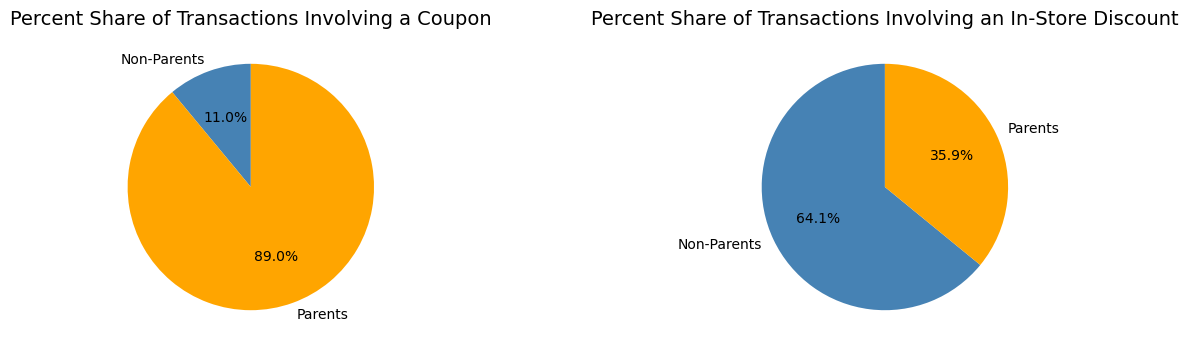

In [18]:
fig, ax_array = plt.subplots(1,2,figsize=(15, 4))
ax_array[0].pie(coup, labels = labels, autopct = '%1.1f%%', startangle = 90, colors = ['steelblue', 'orange'])
ax_array[0].set_title('Percent Share of Transactions Involving a Coupon', size = 14)
ax_array[1].pie(disc, labels = labels, autopct = '%1.1f%%', startangle = 90, colors = ['steelblue', 'orange'])
ax_array[1].set_title('Percent Share of Transactions Involving an In-Store Discount', size = 14)

Above we have plotted the percent share for parents and non-parents of all transactions involving a coupon and percent share for all transactions involving an in-store discount. Here it is readily apparent that parents are far and away more likely to use a coupon when making a purchase while both groups show a response proportionate to their size when it comes to in-store sales. From this we can conclude that the best form of promotion to entice parents is coupons while non-parents don't show any significant sensitivity to promotions.



# Conclusion and Final Recommendation
This report seeks to provide a blueprint for targeting parents and non-parents with promotions. Parents and non-parents are unique groups that have the potential to provide a significant benefit as customers at Regork. Parents provide access to the next generation of customers while non-parents have a greater amount of disposable income. We can see this latter point reflected in the shopping profiles of each group where non-parents purchase more valuable goods and skew towards more luxury items when shopping when compared to parents. Additionally these shopping profiles reveal that parents spend more money on milk than any other product type and uniquely buy diapers while non-parents spend more on beer than any other product and uniquely buy frozen entrees. They differ again when it comes to preferred shopping days. Parents shop more throughout the week while non-parents are concentrate their purchases on Thursday and Friday. Finally parents are much more receptive to coupons than non-parents though both groups are equally receptive to in-store sales.

As a result our final recommendation for targeting each group with promotions is as follows:

Given the high receptivity of parents to coupons it seems that a coupon based campaign centered around the days of Monday and Wednesday when parent density is highest in stores would be the best course of action. Ideal products to target with this campaign would be milk or diapers. Additional consideration could be made concerning setting up parent oriented cross merchandising displays around the diapers as well.

Given the shopping patterns of non-parents and their relative lack of interest in coupons it seems that targeted in-store sales on Thursday and Friday would be the best course of action. Placing frozen entrees and beer on sale or simply placing more premium products on sale around frozen entree displays are good targets.

For future marketing campaigns more granular product data would be of particular interest. These recommendations suffer from their inability give more than product category level data. Brand data beyond the 'national' or 'private' metric would significantly increase our ability to both profile and target parent and non-parent groups. Perhaps non-parents are more likely to buy organic or perhaps certain kinds of packaging are more appealing to parents. We see these as good jumping off points for future research into the parent and non-parent customer bases at Regork.